# EDA

In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
%matplotlib inline

import os
import torch
import numpy as np
from ipywidgets import interact
from tqdm import tqdm

from utils.data_utils import normalize_3d_array

## Data Visualization

In [2]:
# visualize the normalized image and label overlaid with each other (alpha=0.5)
def visualize_image_label_3d(image, label):
    @interact
    def plot_slice(slice=(1, image.shape[0]-1, 1)):
        fig, ax = plt.subplots(1, 1)
        ax.imshow(image[slice], cmap="gray")
        ax.imshow(label[slice], cmap="jet", alpha=0.3)
        ax.set_title(f"Slice {slice}")
        plt.show()

### Task01_BrainTumour

In [3]:
# paths
im_dir = "/home/jaggbow/scratch/clem/dataset/Task01_BrainTumour/train_val"
im_files = sorted(os.listdir(im_dir))[:len(os.listdir(im_dir))//2]
label_dir = "/home/jaggbow/scratch/clem/dataset/Task01_BrainTumour/train_val"
label_files = sorted(os.listdir(label_dir))[len(os.listdir(label_dir))//2:]

In [18]:
# load an example of image
image_3d = np.load(os.path.join(im_dir, im_files[1]))[1]
# load an example of label
label_3d = np.load(os.path.join(label_dir, label_files[1]))[0]

In [19]:
# shapes
print(f"Image shape: {image_3d.shape}")
print(f"Label shape: {label_3d.shape}")

Image shape: (155, 240, 240)
Label shape: (155, 240, 240)


In [13]:
# print unique values of label_3d
print(np.unique(label_3d))

[0. 1. 2. 3.]


In [12]:
visualize_image_label_3d(image_3d, label_3d)

interactive(children=(IntSlider(value=77, description='slice', max=154, min=1), Output()), _dom_classes=('widg…

In [6]:
count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0
for i in tqdm(range(0, len(label_files))):
    label_3d = np.load(os.path.join(label_dir, label_files[i]))[0]
    count_0 += np.count_nonzero(label_3d == 0)
    count_1 += np.count_nonzero(label_3d == 1)
    count_2 += np.count_nonzero(label_3d == 2)
    count_3 += np.count_nonzero(label_3d == 3)
print(count_0)
print(count_1)
print(count_2)
print(count_3)
print("average 0: ", count_0/len(label_files))
print("average 1: ", count_1/len(label_files))
print("average 2: ", count_2/len(label_files))
print("average 3: ", count_3/len(label_files))
# print("ratio: ", count_0/count_1)

4271154985
31456687
8731567
9808761
average 0:  8824700.382231405
average 1:  64993.15495867769
average 2:  18040.427685950413
average 3:  20266.035123966944


### Task02_Heart

In [4]:
# paths
im_dir = "/home/jaggbow/scratch/clem/dataset/Task02_Heart/train_val"
im_files = sorted(os.listdir(im_dir))[:len(os.listdir(im_dir))//2]
label_dir = "/home/jaggbow/scratch/clem/dataset/Task02_Heart/train_val"
label_files = sorted(os.listdir(label_dir))[len(os.listdir(label_dir))//2:]

In [5]:
im_slice = 70
# load an example of image
image_3d = np.load(os.path.join(im_dir, im_files[0]))[0]
image_2d = image_3d[im_slice]
# load an example of label
label_3d = np.load(os.path.join(label_dir, label_files[0]))[0]
label_2d = label_3d[im_slice]

In [6]:
# print the shape of the image and label
print(f"Image shape: {image_3d.shape}")
print(f"Label shape: {label_3d.shape}")

Image shape: (130, 320, 320)
Label shape: (130, 320, 320)


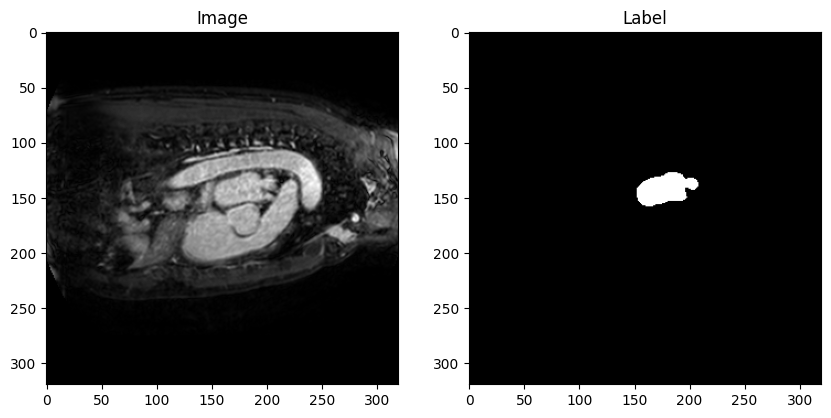

In [7]:
# visualize the image and label side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_2d, cmap="gray")
ax[0].set_title("Image")
ax[1].imshow(label_2d, cmap="gray")
ax[1].set_title("Label")

plt.show()

In [8]:
# print the value range of the image and label
print(f"Image value range: {np.min(image_3d)} - {np.max(image_3d)}")
print(f"Label value range: {np.min(label_3d)} - {np.max(label_3d)}")

# print the unique values of the label
print(f"Label unique values: {np.unique(label_3d)}")

# print label distribution
print(f"Label distribution: {np.unique(label_3d, return_counts=True)[1]}")

Image value range: 0.0 - 1999.0
Label value range: 0.0 - 1.0
Label unique values: [0. 1.]
Label distribution: [13266997    45003]


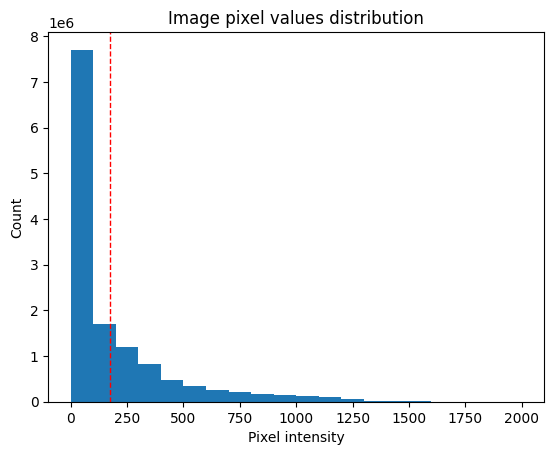

In [9]:
# plot the histogram of the 3d image pixel values
plt.hist(image_3d.flatten(), bins=20)
plt.title("Image pixel values distribution")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")
plt.axvline(image_3d.mean(), color="r", linestyle="dashed", linewidth=1)
plt.show()

In [10]:
image_3d_norm = normalize_3d_array(image_3d)

print(f"Normalized image value range: {np.min(image_3d_norm)} - {np.max(image_3d_norm)}")

Normalized image value range: 0.0 - 1.0


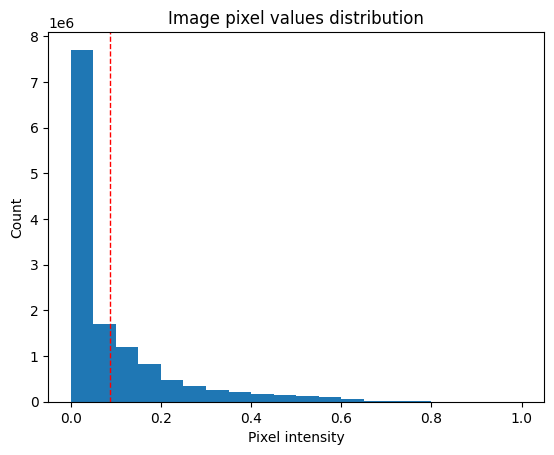

In [11]:
# plot the histogram of the 3d normalized image pixel values
plt.hist(image_3d_norm.flatten(), bins=20)
plt.title("Image pixel values distribution")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")
plt.axvline(image_3d_norm.mean(), color="r", linestyle="dashed", linewidth=1)
plt.show()

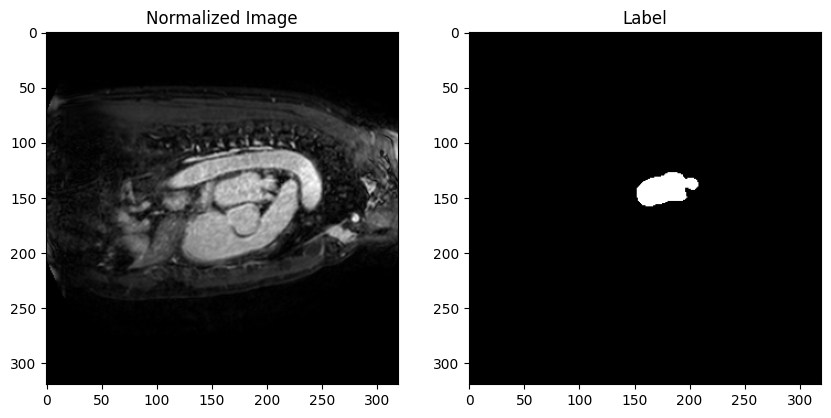

In [12]:
# visualize the normalized image and label side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_3d_norm[im_slice], cmap="gray")
ax[0].set_title("Normalized Image")
ax[1].imshow(label_2d, cmap="gray")
ax[1].set_title("Label")

plt.show()

In [14]:
visualize_image_label_3d(image_3d_norm, label_3d)

interactive(children=(IntSlider(value=65, description='slice', max=129, min=1), Output()), _dom_classes=('widg…

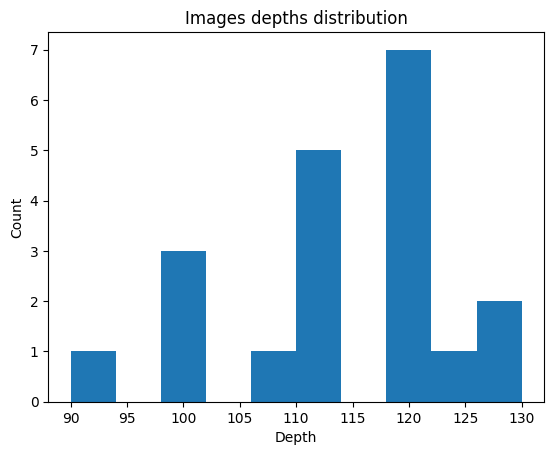

In [41]:
# histogram of the images depths
plt.hist([np.load(os.path.join(im_dir, image_3d)).shape[1] for image_3d in im_files], bins=10)
plt.title("Images depths distribution")
plt.xlabel("Depth")
plt.ylabel("Count")

plt.show()

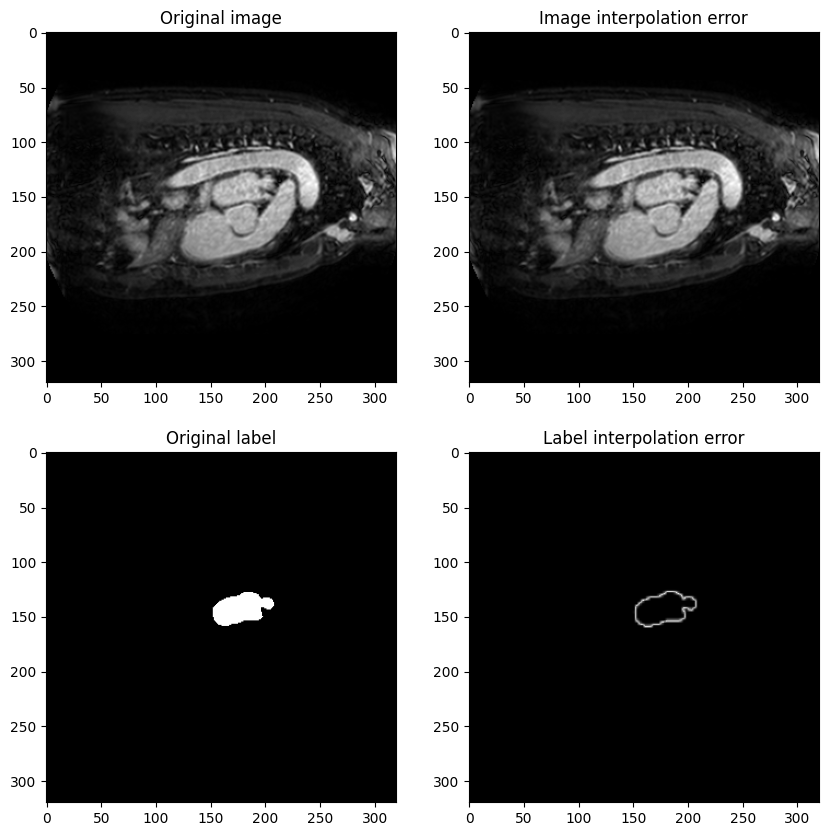

In [44]:
# effect of reshaping the image to 128x128x128
image_3d_tensor = torch.from_numpy(image_3d).unsqueeze(0).unsqueeze(0).float()
label_3d_tensor = torch.from_numpy(label_3d).unsqueeze(0).unsqueeze(0).float()
image_3d_tensor_128 = torch.nn.functional.interpolate(image_3d_tensor, size=(128, 128, 128), mode="trilinear")
label_3d_tensor_128 = torch.nn.functional.interpolate(label_3d_tensor, size=(128, 128, 128), mode="trilinear")
image_3d_tensor_320 = torch.nn.functional.interpolate(label_3d_tensor_128, size=(image_3d_tensor.shape[2], 320, 320), mode="trilinear")
label_3d_tensor_320 = torch.nn.functional.interpolate(label_3d_tensor_128, size=(label_3d_tensor.shape[2], 320, 320), mode="trilinear")

# visualize the absolute difference between the original and the reshaped image and label
s = 70
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(image_3d_tensor.squeeze().numpy()[s], cmap="gray")
ax[0, 0].set_title("Original image")
ax[0, 1].imshow(np.abs(image_3d_tensor.squeeze().numpy()[s] - image_3d_tensor_320.squeeze().numpy()[s]), cmap="gray")
ax[0, 1].set_title("Image interpolation error")
ax[1, 0].imshow(label_3d_tensor.squeeze().numpy()[s], cmap="gray")
ax[1, 0].set_title("Original label")
ax[1, 1].imshow(np.abs(label_3d_tensor.squeeze().numpy()[s] - label_3d_tensor_320.squeeze().numpy()[s]), cmap="gray")
ax[1, 1].set_title("Label interpolation error")

plt.show()

### Task03_Liver

In [29]:
# paths
im_dir = "/home/jaggbow/scratch/clem/dataset/Task03_Liver/imagesTr"
im = np.load(os.path.join(im_dir, "image_000.npy"))

In [30]:
im.shape

(1, 75, 512, 512)

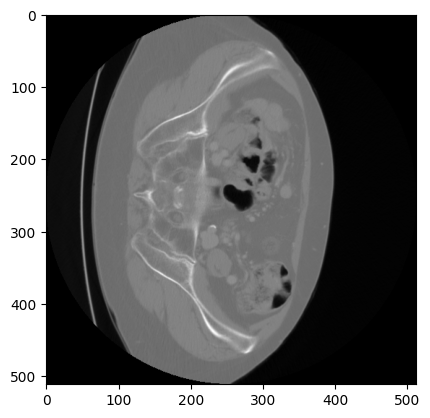

In [31]:
plt.imshow(im[0][30], cmap="gray")

### Task10_Colon

In [3]:
# paths
im_dir = "/home/jaggbow/scratch/clem/dataset/Task10_Colon/train_val"
im_files = sorted(os.listdir(im_dir))[:len(os.listdir(im_dir))//2]
label_dir = "/home/jaggbow/scratch/clem/dataset/Task10_Colon/train_val"
label_files = sorted(os.listdir(label_dir))[len(os.listdir(label_dir))//2:]

In [4]:
# load an example of image
image_3d = np.load(os.path.join(im_dir, im_files[1]))[0]
# load an example of label
label_3d = np.load(os.path.join(label_dir, label_files[1]))[0]

In [6]:
visualize_image_label_3d(image_3d, label_3d)

interactive(children=(IntSlider(value=49, description='slice', max=97, min=1), Output()), _dom_classes=('widge…

In [28]:
count_0 = 0
count_1 = 0
for i in tqdm(range(0, len(label_files))):
    label_3d = np.load(os.path.join(label_dir, label_files[i]))[0]
    count_0 += np.count_nonzero(label_3d == 0)
    count_1 += np.count_nonzero(label_3d == 1)
print(count_0)
print(count_1)
print("average 0: ", count_0/len(label_files))
print("average 1: ", count_1/len(label_files))
print("ratio: ", count_0/count_1)

3533465548
1808436
average 0:  28043377.365079366
average 1:  14352.666666666666
ratio:  1953.8792348747759


## Data Interpolation

In [45]:
# convert the normalized image to torch tensor
image_3d_tensor = torch.from_numpy(image_3d_norm).unsqueeze(0).unsqueeze(0).float()
label_3d_tensor = torch.from_numpy(label_3d).unsqueeze(0).unsqueeze(0).float()

# print shapes
print(f"Image shape: {image_3d_tensor.shape}")
print(f"Label shape: {label_3d_tensor.shape}")

# resize the image and label to 128x128x128
resize_shape = (128, 128, 128)
image_3d_tensor_interpolated = torch.nn.functional.interpolate(image_3d_tensor, size=resize_shape, mode="trilinear")
label_3d_tensor_interpolated = torch.nn.functional.interpolate(label_3d_tensor, size=resize_shape, mode="trilinear")

# print new shapes
print(f"Image shape interpolated: {image_3d_tensor_interpolated.shape}")
print(f"Label shape interpolated: {label_3d_tensor_interpolated.shape}")


Image shape: torch.Size([1, 1, 130, 320, 320])
Label shape: torch.Size([1, 1, 130, 320, 320])
Image shape interpolated: torch.Size([1, 1, 128, 128, 128])
Label shape interpolated: torch.Size([1, 1, 128, 128, 128])


In [46]:
# visualize the image and label after interpolation
visualize_image_label_3d(image_3d_tensor_interpolated[0][0], label_3d_tensor_interpolated[0][0])

interactive(children=(IntSlider(value=64, description='slice', max=127, min=1), Output()), _dom_classes=('widg…

## Preprocessing

In [1]:
import sys
sys.path.append('utils')

from utils.data_utils import convert_niigz_to_numpy

convert_niigz_to_numpy('Task05_Prostate')

100%|██████████| 16/16 [00:05<00:00,  2.78it/s]


In [38]:
import sys
sys.path.append('preprocessing')

from preprocessing.preprocess import preprocess_data

preprocess_data("dataset/original/Task01_BrainTumour")